### Module 5 - Unsupervised learning Project.

#### Introduction :
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment:

A double decker bus
Cheverolet van, Saab 9000 and
An Opel Manta 400 cars.

#### Problem statement   :
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. Apply dimensionality reduction technique – PCA and train a model using both principal components and raw data and calculate the accuracy.

#### Attributes Information:
- Compactness -
- Circularity -
- Distance_circularity -
- Radius_ratio -
- pr.axis_aspect_ratio -
- max.length_aspect_ratio -
- Scatter_ratio -
- Elongatedness -
- pr.axis_rectangularity -
- Max.length_rectangularity -
- Scaled_variance -
- Scaled_variance.1 -
- Scaled_radius_of_gyration -
- Scaled_radius_of_gyration.1 -
- Skewness_about -
- skewness_about.1 -
- skewness_about.2 -
- Hollows_ratio -
- class -

In [1]:
#Load Necessary libraries

from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')
#Numerical Libraries
import numpy as np

# to handle data in form of rows and columns
import pandas as pd

## To enable plotting graphs in Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Sklearn package's data splitting function 

from sklearn.model_selection import train_test_split

#sklearn package for PCA
from sklearn.decomposition import PCA

#sklearn package for support vector machine
from sklearn import svm

#sklearn package for confusion matrix
from sklearn.metrics import accuracy_score

#sklearn package for gridsearchcv
from sklearn.model_selection import GridSearchCV

#sklearn package for scaling
from sklearn.preprocessing import StandardScaler

##### QUESTION 1 - Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (15 points)

In [2]:
#load the dataset
original_data = pd.read_csv("vehicle-1.csv")

In [3]:
#let's have a look of first few rows
original_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
#Number of rows and coulmns
original_data.shape

(846, 19)

In [5]:
#five pont summary by using describe function
original_data.describe(include = 'all' ).transpose()

count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   
scaled_radius_of_gyration     844    NaN  NaN  NaN   174.71  32.5848  109   
scaled_radius_of_gyration.1   842    NaN  NaN  NaN  72.4477  7.48619   59   
skewness_about                840    NaN  NaN  NaN  6.36429  4.92065    0   
skewness_about.1              845    NaN  NaN  NaN  12.6024  8.93608    0   
skewness_about.2              845    NaN  NaN  NaN   188.92  6.15581  176   
hollows_ratio                 846    NaN  NaN  NaN  195.632   7.4388  181   
class                         846      3  car  429      NaN      NaN  NaN   

                                25%    50%  75%   max  
compactness                      87     93  100   119  
circularity                      40     44   49    59  
distance_circularity             70     80   98   112  
radius_ratio                    141    167  195   333  
pr.axis_aspect_ratio             57     61   65   138  
max.length_aspect_ratio           7      8   10    55  
scatter_ratio                   147    157  198   265  
elongatedness                    33     43   46    61  
pr.axis_rectangularity           19     20   23    29  
max.length_rectangularity       137    146  159   188  
scaled_variance                 167    179  217   320  
scaled_variance.1               318  363.5  587  1018  
scaled_radius_of_gyration       149  173.5  198   268  
scaled_radius_of_gyration.1      67   71.5   75   135  
skewness_about                    2      6    9    22  
skewness_about.1                  5     11   19    41  
skewness_about.2                184    188  193   206  
hollows_ratio                190.25    197  201   211  
class                           NaN    NaN  NaN   NaN

In [6]:
#let's have a look on datatypes of each varible
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Outcome- Except the target variable 'class' all the varibles are of numeric type.

In [7]:
#checking the values of the target column.
original_data["class"].unique()

array(['van', 'car', 'bus'], dtype=object)

In [8]:
#Let's check the number of bus ,car and van in the variable class
original_data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

#####  Checking the presence of missing values. 

In [9]:
#checking the prescence of missingvalues
original_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Outcome - There are missing values in the column circularity , distance_circularity,
radius_ratio , pr.axis_aspect_ratio,scatter_ratio , elongatedness , pr.axis-rectangularity , scaled_variance ,scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1,skewness_about ,skewness_about.1  and skewness_about.2


#### Approach for  Imputing missing values is with 'class-feature combination mode' ,that is replacing the missing values with the mode of that column based on the class. It could give better imputation accuracy.


In [10]:
#splitting the main dataframe into three different dataframes based on class


car_df = original_data[original_data["class"] == 'car']
van_df = original_data[original_data["class"] == 'van']
bus_df = original_data[original_data["class"] == 'bus']

print(car_df.shape)
print(van_df.shape)
print(bus_df.shape)

(429, 19)
(199, 19)
(218, 19)


In [11]:
#imputing missing values with the mode, column-wise, separately for each class

car_df_new = car_df.fillna(car_df.mode().iloc[0])
van_df_new = van_df.fillna(van_df.mode().iloc[0])
bus_df_new = bus_df.fillna(van_df.mode().iloc[0])

In [12]:
##combining the three dataframes into a single dataframe after imputation of missing values

a = car_df_new.append(van_df_new, ignore_index=True)
veh= a.append(bus_df_new, ignore_index = True)
print(veh.shape)


(846, 19)


In [13]:
#cross checking the missing values 
veh.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Outcome - Imputation succesfull as no missing values found.

#### ****** Checking the presence of  outliers using boxplot on each variable ******

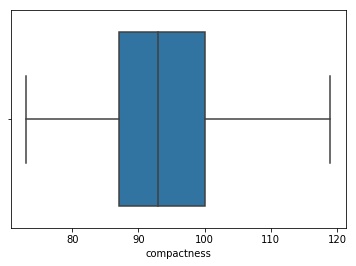

In [14]:
#checking Outliers in the column compactness using boxplot
sns.boxplot(veh['compactness'])

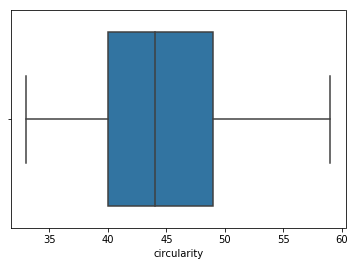

In [15]:
#checking  outliers in the column circularity using boxplot
sns.boxplot(veh['circularity'])

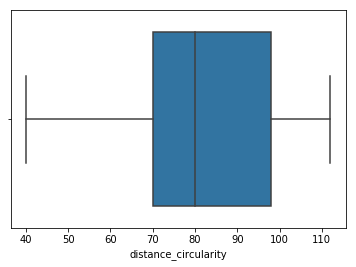

In [16]:
#checking of outliers in the coulmn distance_circularity 
sns.boxplot(veh['distance_circularity'])

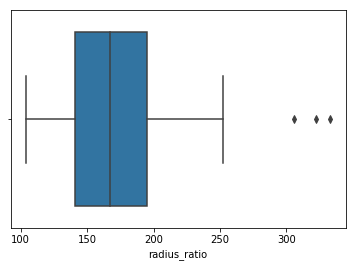

In [17]:
#checking outliers in the column radius ratio
sns.boxplot(veh['radius_ratio'])

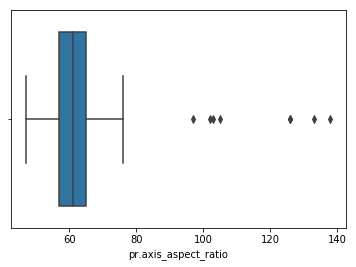

In [18]:
#checking the presence of outliers in the column pr.axis_aspect_ratio
sns.boxplot(veh['pr.axis_aspect_ratio'])

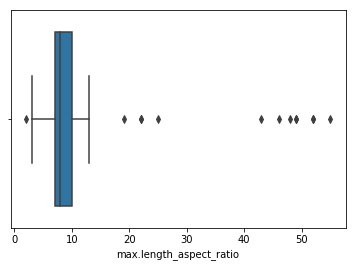

In [19]:
#checking the presence of outliers in teh column max.length_aspect_ratio 
sns.boxplot(veh['max.length_aspect_ratio'])

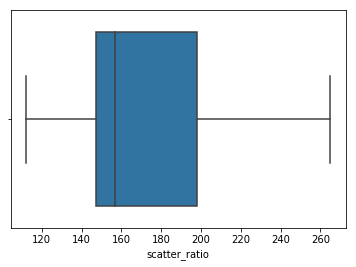

In [20]:
#checking the presence of outliers in the column scatter_ratio  
sns.boxplot(veh['scatter_ratio'])

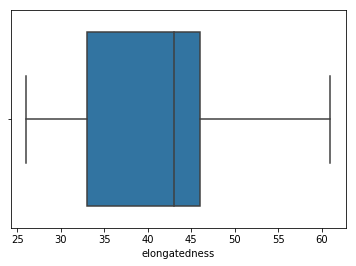

In [21]:
#checking the presence of Outlier in the column elongatedness
sns.boxplot(veh['elongatedness'])

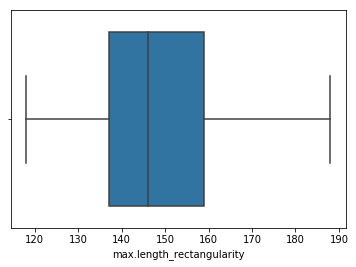

In [22]:
#checking the presence of outlier in the column pr.axis_rectangularity    
sns.boxplot(veh['max.length_rectangularity'])

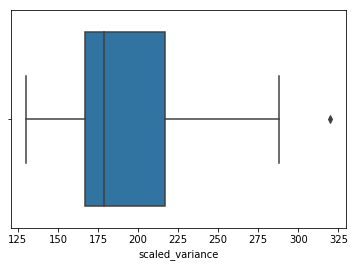

In [23]:
#checking the presence of outliers in the column scaled_variance
sns.boxplot(veh['scaled_variance'])

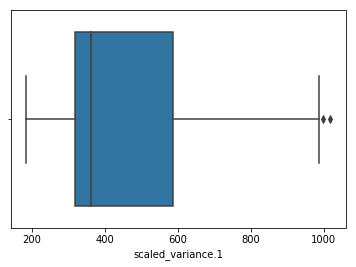

In [24]:
#checking the presence of outliers in the column scaled_variance.1  
sns.boxplot(veh['scaled_variance.1'])

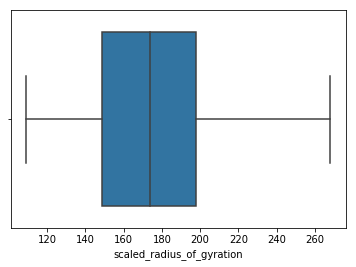

In [25]:
#checking the presence of outliers in the column scaled_variance.2
sns.boxplot(veh['scaled_radius_of_gyration'])

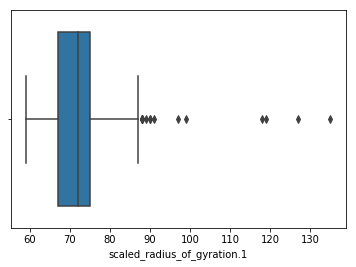

In [26]:
#checking the presence of outliers in the column scaled_radius_of_gyration.1  
sns.boxplot(veh['scaled_radius_of_gyration.1'])

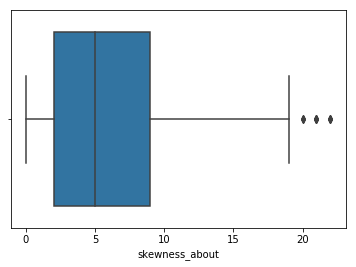

In [27]:
#checking the presence of outliers in the column skewness_about 
sns.boxplot(veh['skewness_about'])

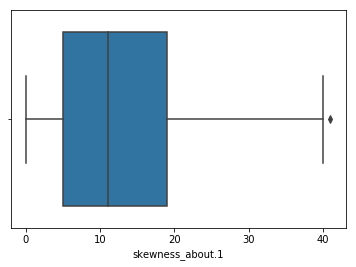

In [28]:
#checking the presence of outliers in the column skewness_about.1 
sns.boxplot(veh['skewness_about.1'])

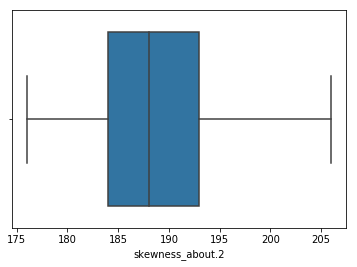

In [29]:
#checking the presence of outliers in the column skewness_about.2               
sns.boxplot(veh['skewness_about.2'])

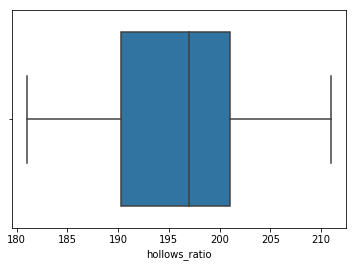

In [30]:
#checking the presence of outlier in the column hollows_ratio
sns.boxplot(veh['hollows_ratio'])

Outcome - There exist outliers in the columns "radius_ratio" , "pr.axis_aspect_ratio", "max.length_aspect_ratio" , "scaled_variance" , "scaled_variance.1" , "scaled_radius_of_gyration.1" , "skewness_about" , "skewness_about.1".

#### Treatment of Outliers :
#### It is essential to handle outliers before performing PCA as PCs tend to get driven by outliers
#### In this case we simply remove the rows corresponding to outliers values of features.

In [31]:
a = veh.quantile(0.25)
b = veh.quantile(0.75)

IQR = b-a
veh_no_out = veh[~((veh < (a - 1.5 * IQR)) |(veh > (b + 1.5 * IQR))).any(axis=1)]

veh_no_out.shape

(813, 19)

Outcome - Initially we have 846 rows and after removing rows containing outliers we have 813 rows i.e a drop of 3.9% of data which is not something big .

[Text(0, 0, 'compactness'),
 Text(0, 0, 'circularity'),
 Text(0, 0, 'distance_circularity'),
 Text(0, 0, 'radius_ratio'),
 Text(0, 0, 'pr.axis_aspect_ratio'),
 Text(0, 0, 'max.length_aspect_ratio'),
 Text(0, 0, 'scatter_ratio'),
 Text(0, 0, 'elongatedness'),
 Text(0, 0, 'pr.axis_rectangularity'),
 Text(0, 0, 'max.length_rectangularity'),
 Text(0, 0, 'scaled_variance'),
 Text(0, 0, 'scaled_variance.1'),
 Text(0, 0, 'scaled_radius_of_gyration'),
 Text(0, 0, 'scaled_radius_of_gyration.1'),
 Text(0, 0, 'skewness_about'),
 Text(0, 0, 'skewness_about.1'),
 Text(0, 0, 'skewness_about.2'),
 Text(0, 0, 'hollows_ratio')]

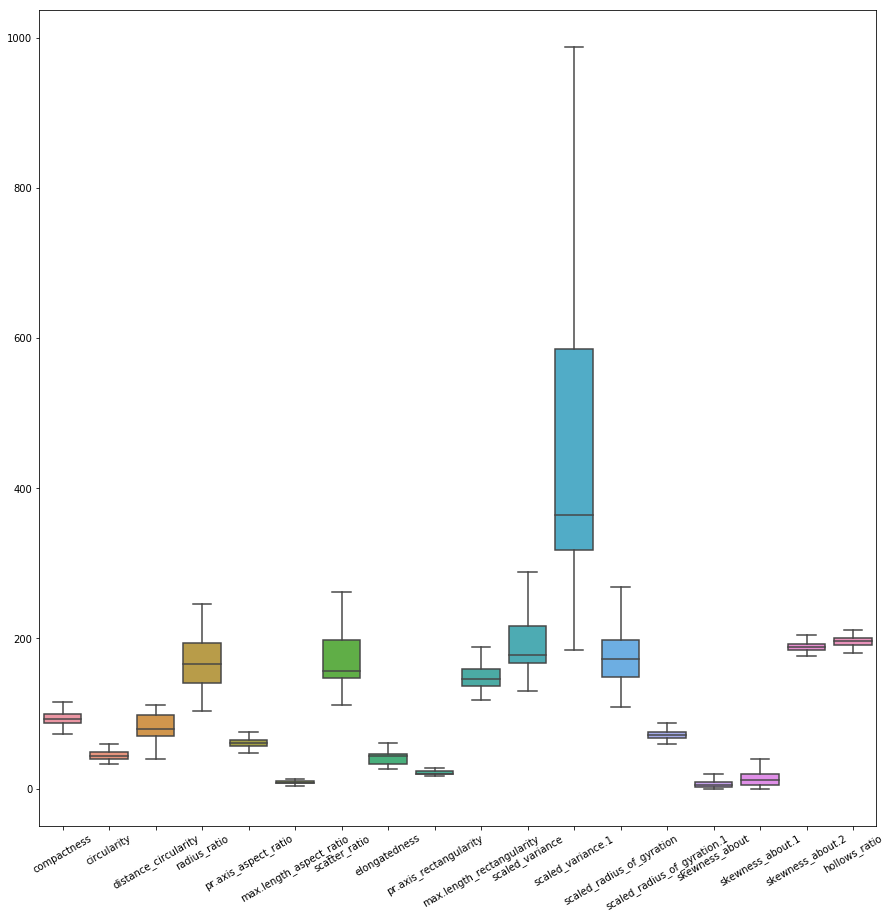

In [32]:
plt.figure(figsize = (15,15))
ax = sns.boxplot(data = veh_no_out)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

#### ******Applying Label Encoder to the Class variable******

In [33]:
#choosing only the categorical column
                                  

veh2_c = veh_no_out.select_dtypes(exclude="number")
c = veh2_c.columns ##choosing only the categorical variable columns

In [34]:
#importing Labelencoder from sklearn

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [35]:
##encoding is done on the slice containing non-numerical columns of the main dataframe 

le = LabelEncoder()
veh_no_out[c] = veh_no_out[c].apply(le.fit_transform)
veh_no_out[c].head()

class
0      1
1      1
2      1
3      1
4      1

In [36]:
#print(veh2['class'].unique())

veh_no_out.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0          104         50.0                 106.0         209.0   
1           93         44.0                  98.0         197.0   
2           90         34.0                  66.0         136.0   
3           96         55.0                 103.0         201.0   
4          104         54.0                 100.0         186.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  66.0                       10          207.0   
1                  62.0                       11          183.0   
2                  55.0                        6          123.0   
3                  65.0                        9          204.0   
4                  61.0                       10          216.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           32.0                    23.0                        158   
1           36.0                    22.0                        146   
2           54.0                    17.0                        118   
3           32.0                    23.0                        166   
4           31.0                    24.0                        173   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            223.0              635.0                      220.0   
1            202.0              505.0                      152.0   
2            148.0              224.0                      118.0   
3            227.0              624.0                      246.0   
4            225.0              686.0                      220.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         73.0            14.0               9.0   
1                         64.0             4.0              14.0   
2                         65.0             5.0              26.0   
3                         74.0             6.0               2.0   
4                         74.0             5.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             188.0            196      1  
1             195.0            204      1  
2             196.0            202      1  
3             186.0            194      1  
4             185.0            195      1

#####  ******Dropping the class variable *******

In [37]:
veh2 = veh_no_out.drop(columns = ['class'])
print(veh2.shape)
veh2.head()

(813, 18)


compactness  circularity  distance_circularity  radius_ratio  \
0          104         50.0                 106.0         209.0   
1           93         44.0                  98.0         197.0   
2           90         34.0                  66.0         136.0   
3           96         55.0                 103.0         201.0   
4          104         54.0                 100.0         186.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  66.0                       10          207.0   
1                  62.0                       11          183.0   
2                  55.0                        6          123.0   
3                  65.0                        9          204.0   
4                  61.0                       10          216.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           32.0                    23.0                        158   
1           36.0                    22.0                        146   
2           54.0                    17.0                        118   
3           32.0                    23.0                        166   
4           31.0                    24.0                        173   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            223.0              635.0                      220.0   
1            202.0              505.0                      152.0   
2            148.0              224.0                      118.0   
3            227.0              624.0                      246.0   
4            225.0              686.0                      220.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         73.0            14.0               9.0   
1                         64.0             4.0              14.0   
2                         65.0             5.0              26.0   
3                         74.0             6.0               2.0   
4                         74.0             5.0              11.0   

   skewness_about.2  hollows_ratio  
0             188.0            196  
1             195.0            204  
2             196.0            202  
3             186.0            194  
4             185.0            195

####   QUESTION 2 - Understanding the attributes - Find the relationship between different attributes (Independent variables) and  choose carefully which all attributes have to be a part of the analysis and why (15 points)

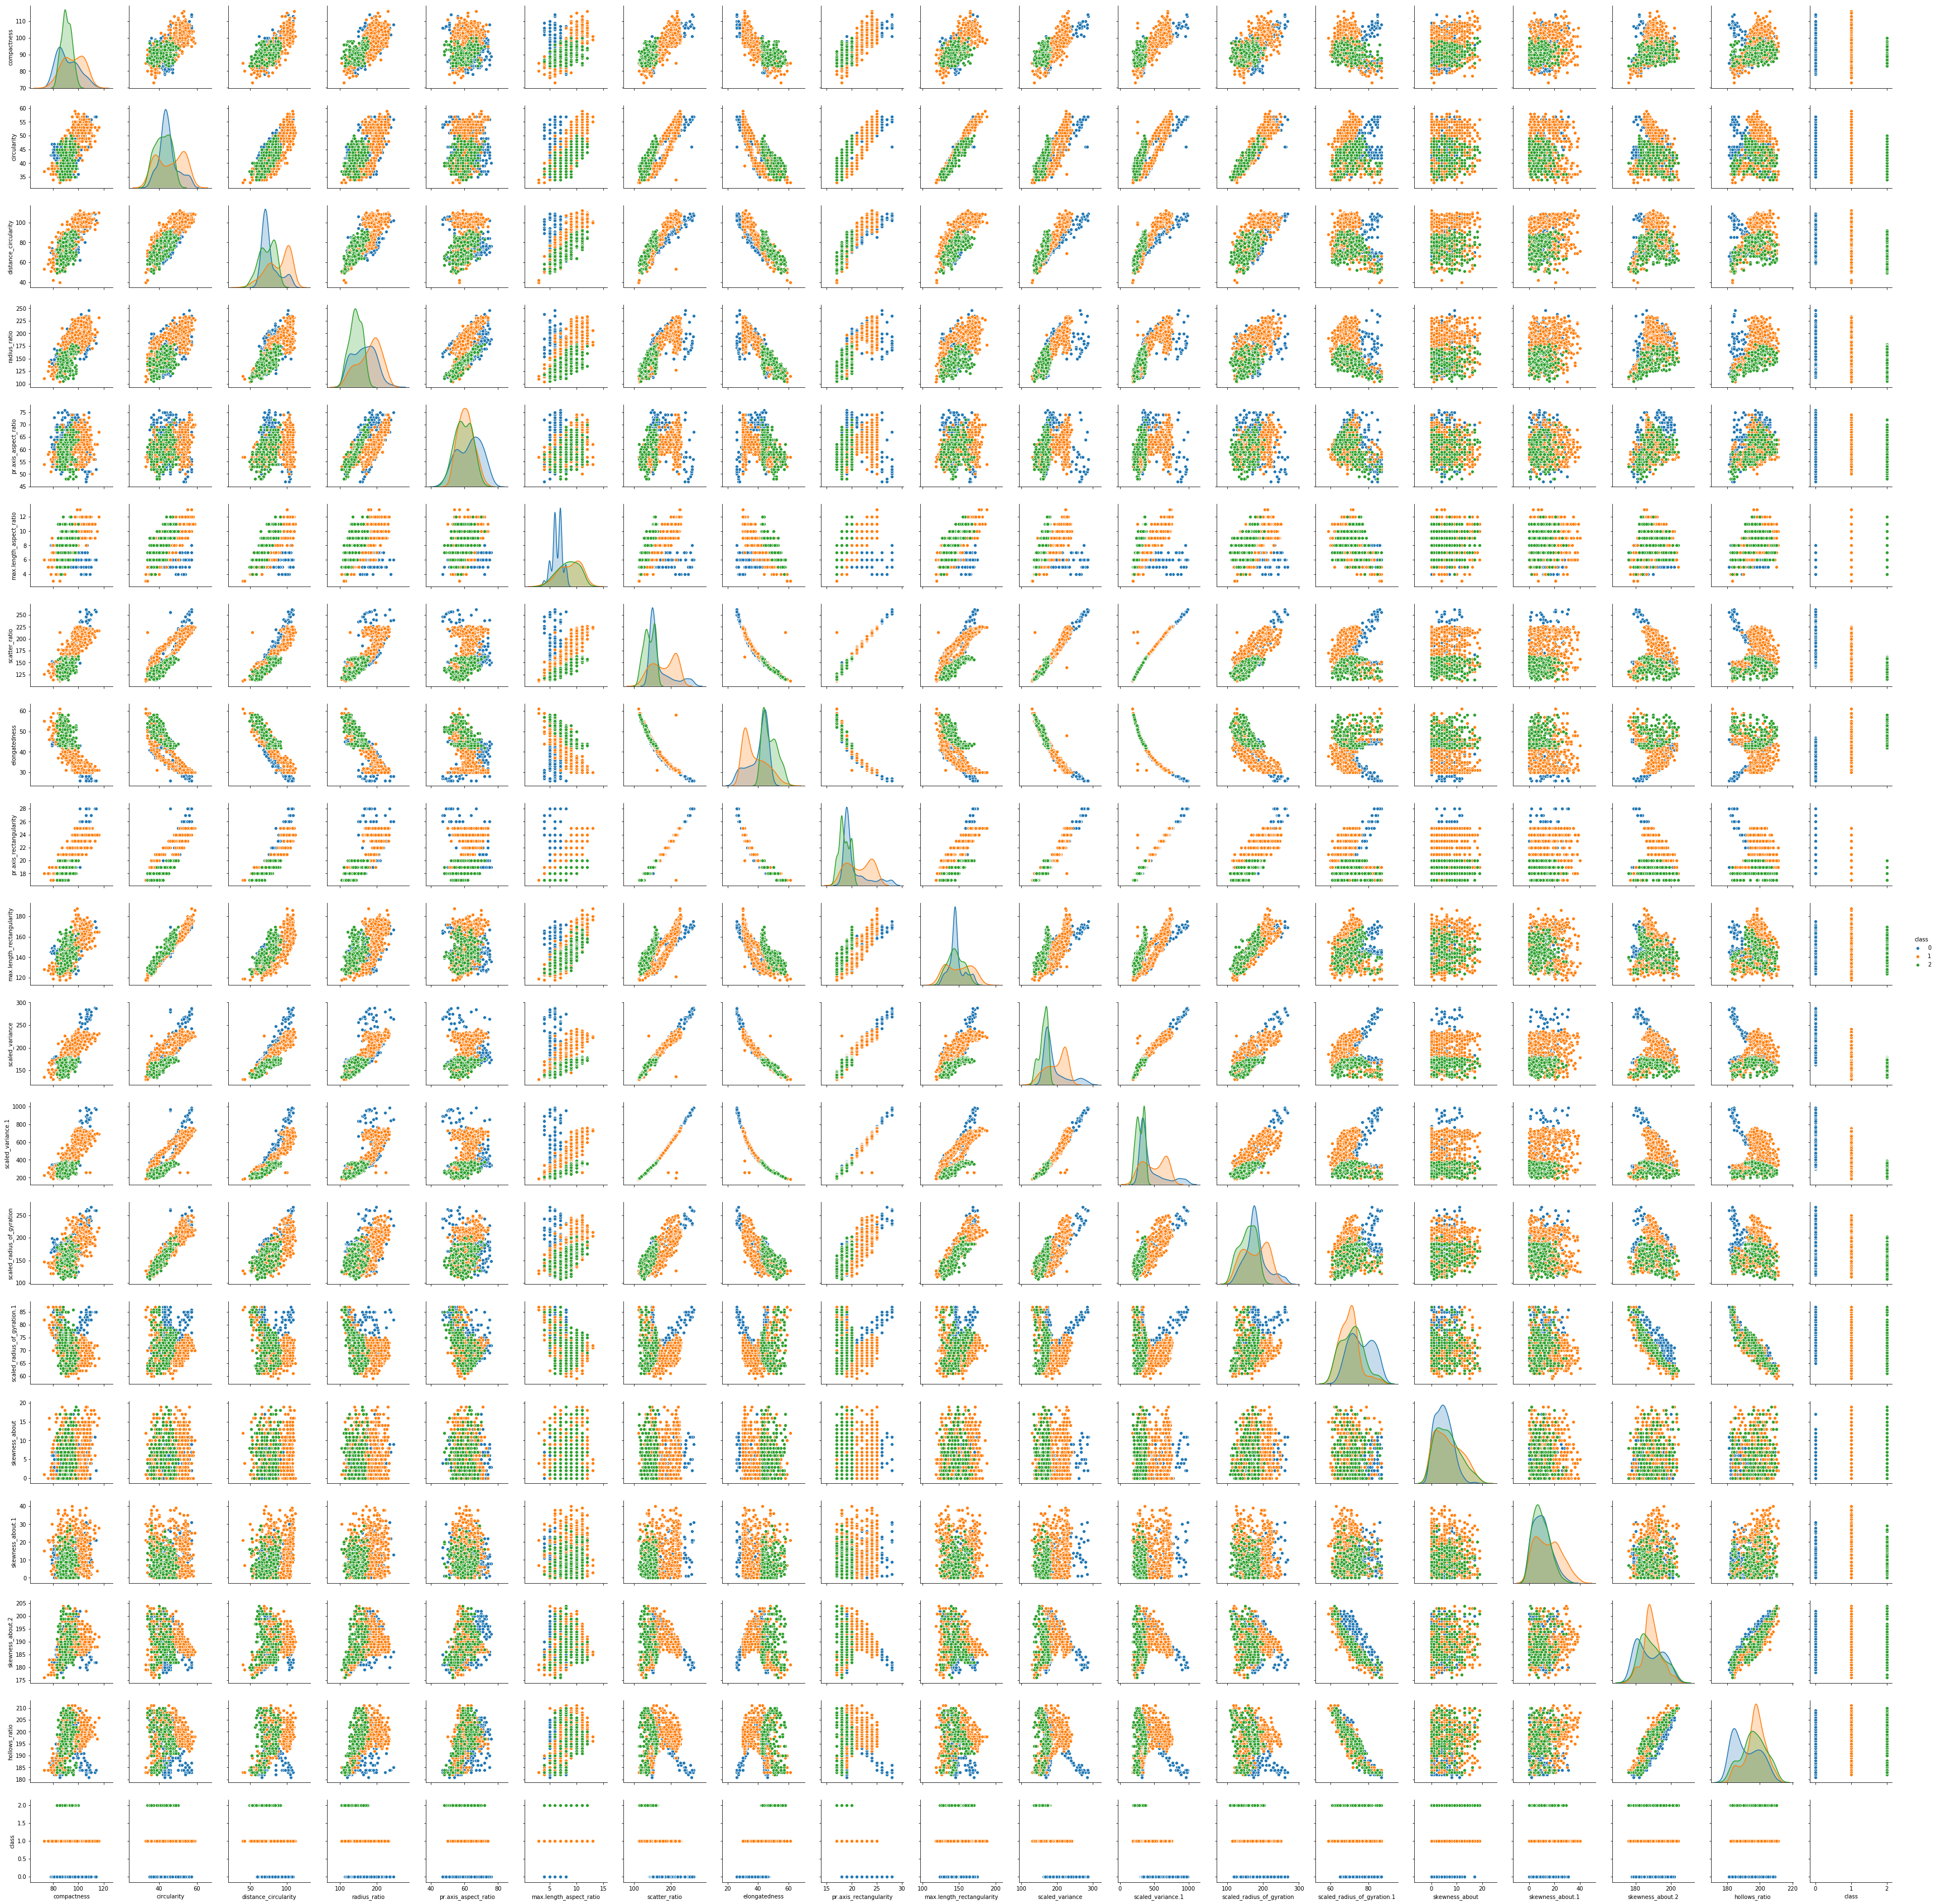

In [38]:
#One more multivariate analysis,here pairplot is used.

sns.pairplot(veh_no_out,hue = 'class',diag_kind ='kde')

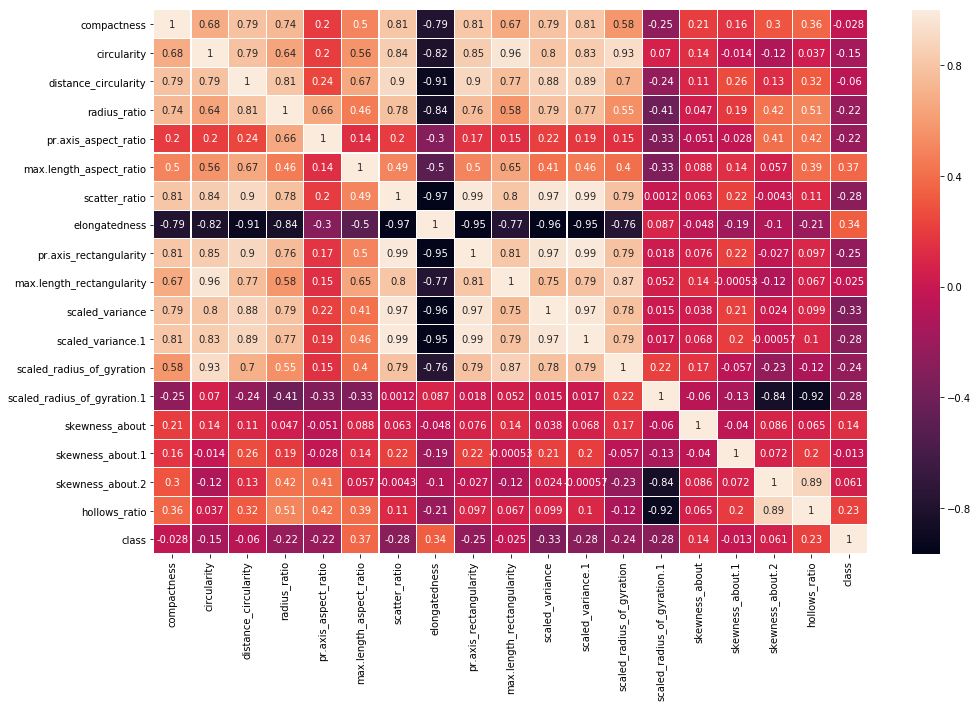

In [39]:
#correlation Matrix and Heatmap applied on the dataframe which contain target variable as well

corr = veh_no_out.corr()
fig = plt.figure(figsize=(16,10))
sns.heatmap(veh_no_out.corr(),annot=True,linewidths=.10)
plt.show()

**Careful observation of heatmap will show us that there exists strong correlartions amongst the following features:**

1. compactness
2. circularity
3. distance_circularity'
4. radius_ratio
5. pr.axis_aspect_ratio
6. scatter_ratio
7. elongatedness
8. pr.axis_rectangularity
9. max.length_rectangularity
10. scaled_variance
11. scaled_variance.1
12. skewness_about.2
13. hollows_ratio
#### Since the heatmap indicates strong multicollinearity, we could build a stronger model by improving the signal-to-noise ratio present within the feature space using PCA.

##### QUESTION 3 - Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - (20 points)

In [40]:
#Splitting the data into train and test .

X = veh2
y = veh_no_out['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)


In [41]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  

C:\Users\amreen\newpy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\amreen\newpy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


AttributeError: 'Series' object has no attribute 'columns'

#### Scaling the training & testing sets separately to avoid data loss to the model

In [ ]:
#scaling of taining data

X_train_scaled = sc.fit_transform(X_train)

In [ ]:
#scaling of test data

X_test_scaled = sc.transform(X_test)

#### **Computing Eigen Vectors & the corresponding Eigen Values**

In [42]:
covMatrix = np.cov(X_train_scaled,rowvar=False)


In [43]:
from numpy import linalg as LA
eig_val, eig_vec = LA.eig(covMatrix)
eig_val

array([9.87848047, 3.26270917, 1.20495787, 1.18544268, 0.91108193,
       0.60647361, 0.33658722, 0.23413419, 0.11283007, 0.07891373,
       0.06330602, 0.04225596, 0.03114973, 0.0284039 , 0.0100353 ,
       0.01742862, 0.01435789, 0.01314177])

In [44]:
eig_vec

array([[-0.27409724, -0.08255344,  0.0895818 , -0.0554533 ,  0.13689867,
         0.26511086, -0.02154571,  0.78723223,  0.39037217, -0.10098634,
        -0.04156708,  0.01272184,  0.13242178, -0.1206606 , -0.0273859 ,
        -0.01771866,  0.00931181, -0.00288916],
       [-0.28304214,  0.14029412,  0.16421983,  0.15725868, -0.13527695,
        -0.08829356,  0.37536584, -0.01086347,  0.03624533,  0.23087008,
        -0.09557264,  0.14787689,  0.18852635,  0.13485976,  0.24244727,
         0.39452652, -0.57040816, -0.04743461],
       [-0.29916013, -0.03476007,  0.02290158, -0.15424321, -0.06194263,
        -0.00987157, -0.22126957, -0.27016538,  0.24373919, -0.09613327,
        -0.75242512, -0.30579746, -0.04728378,  0.00960789, -0.01665169,
         0.14465662,  0.08392815, -0.01465428],
       [-0.27679972, -0.18106942, -0.20942425,  0.16002388,  0.10462669,
        -0.12794295, -0.17132281, -0.02584004,  0.15396724,  0.10055828,
         0.07195737,  0.29237959,  0.06529904,  0.762

In [45]:
total_var = eig_val.sum()
sort_var = np.sort(eig_val)
sort_var[:] = sort_var[::-1]
sort_var

array([9.87848047, 3.26270917, 1.20495787, 1.18544268, 0.91108193,
       0.60647361, 0.33658722, 0.23413419, 0.11283007, 0.07891373,
       0.06330602, 0.04225596, 0.03114973, 0.0284039 , 0.01742862,
       0.01435789, 0.01314177, 0.0100353 ])

#### Calculation of the Cumulative Explained Variance for each attribute

In [51]:
explained_variance = [0]
cumulative_var = [0]
cumulative_var_arr = [0]
id = np.linspace(1,18,num=18, dtype='int64')
for id, var in zip(id, sort_var):
    e_var = var/total_var * 100.0
    explained_variance.append(e_var)
    cumulative_var = cumulative_var + e_var
    cumulative_var_arr.append(cumulative_var)
    print('The cumulative explained variance until attribute %1.0f is %3.2f' %(id, cumulative_var))

The cumulative explained variance until attribute 1 is 54.78
The cumulative explained variance until attribute 2 is 72.88
The cumulative explained variance until attribute 3 is 79.56
The cumulative explained variance until attribute 4 is 86.13
The cumulative explained variance until attribute 5 is 91.19
The cumulative explained variance until attribute 6 is 94.55
The cumulative explained variance until attribute 7 is 96.42
The cumulative explained variance until attribute 8 is 97.72
The cumulative explained variance until attribute 9 is 98.34
The cumulative explained variance until attribute 10 is 98.78
The cumulative explained variance until attribute 11 is 99.13
The cumulative explained variance until attribute 12 is 99.36
The cumulative explained variance until attribute 13 is 99.54
The cumulative explained variance until attribute 14 is 99.70
The cumulative explained variance until attribute 15 is 99.79
The cumulative explained variance until attribute 16 is 99.87
The cumulative ex

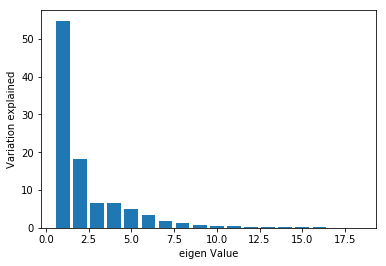

In [52]:
#Barplot for explained variance for all attributes

plt.bar(list(range(1,19)),explained_variance[1:], align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

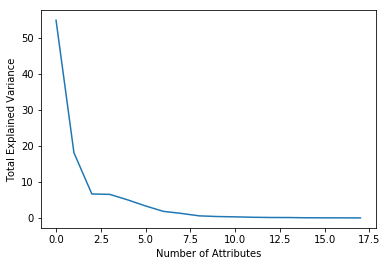

In [86]:
# Plot explained variance

plt.plot(explained_variance[1:])
plt.xlabel('Number of Attributes')
plt.ylabel('Total Explained Variance')
plt.show()

#### Outcome - It can be seen in the above graph that 95% of the variance is explained by 7 attributes

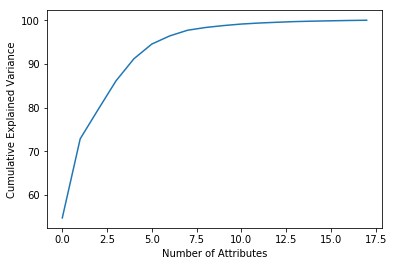

In [87]:
# Plot cumulative variance

plt.plot(cum_var_arr[1:])
plt.xlabel('Number of Attributes')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### **Performing PCA with the  7 attributes**

In [88]:
#Fitting PCA components

pca = PCA(n_components=7)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [89]:
#Transforming the training & testing sets separately

X_train_sc_pca = pca.transform(X_train_scaled)

In [90]:
X_test_sc_pca = pca.transform(X_test_scaled)

In [91]:
#number of observations in pca's training and test set

print("PCA Training data", X_train_sc_pca.shape)
print("PCA Test Data",X_test_sc_pca.shape)

PCA Training data (569, 7)
PCA Test Data (244, 7)


In [92]:
pca.explained_variance_ratio_ 

array([0.54783996, 0.18094306, 0.06682446, 0.06574218, 0.05052671,
       0.03363376, 0.01866643])

In [93]:
Final_df = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6', 'PC7'])
Final_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0   0.274097 -0.082553  0.089582  0.055453  0.136899  0.265111 -0.021546
1   0.283042  0.140294  0.164220 -0.157259 -0.135277 -0.088294  0.375366
2   0.299160 -0.034760  0.022902  0.154243 -0.061943 -0.009872 -0.221270
3   0.276800 -0.181069 -0.209424 -0.160024  0.104627 -0.127943 -0.171323
4   0.115671 -0.230381 -0.345387 -0.520990  0.065268 -0.592268 -0.104460
5   0.190976 -0.095351  0.337920  0.229819 -0.561156 -0.309813 -0.380594
6   0.306704  0.082414 -0.097894  0.066078  0.064206  0.106727 -0.101638
7  -0.306406 -0.019262  0.121975 -0.001964 -0.056862 -0.089669  0.138408
8   0.306179  0.094198 -0.072274  0.076213  0.062775  0.111039 -0.090821
9   0.272505  0.127172  0.227685 -0.095197 -0.240860 -0.115335  0.380667
10  0.301816  0.078427 -0.157639  0.034085  0.121291  0.152783 -0.108463
11  0.304735  0.088416 -0.096959  0.051047  0.098816  0.150246 -0.084486
12  0.256930  0.223178  0.127482 -0.201336 -0.002237 -0.073222  0.407206
13 -0.058246  0.508622 -0.143513 -0.054384  0.133195 -0.102811 -0.021862
14  0.046286 -0.025739  0.646527  0.028655  0.670690 -0.298437 -0.152090
15  0.068491 -0.092486 -0.323525  0.720074  0.176822 -0.427691  0.370186
16  0.053357 -0.506448  0.009200 -0.107472  0.157302  0.278327  0.267028
17  0.098956 -0.506905  0.108482  0.034186 -0.107945  0.048238  0.158899

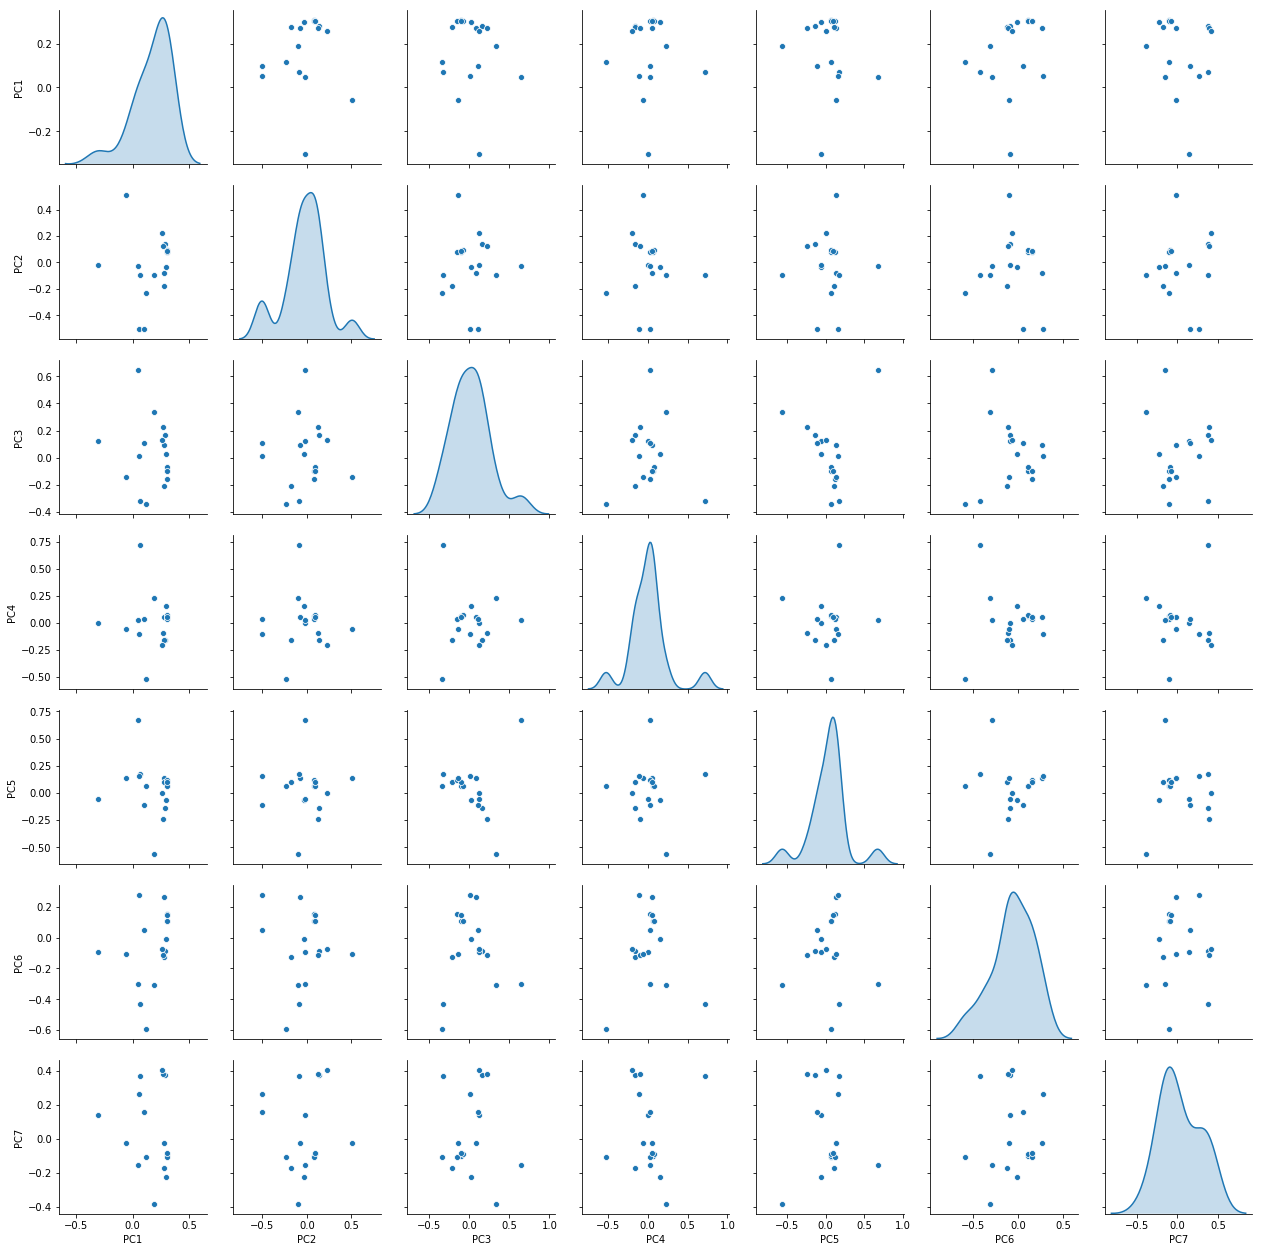

In [94]:
#visual representation of all PCs.

sns.pairplot(Final_df, diag_kind = 'kde')

#### QUESTION 4 -  Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X). 20 points 
#### Question 5 - Optional - Use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. 

In [95]:
#instantiate support vector classifier
svc = svm.SVC()

In [96]:
#assigning C values and kernel  to a variable named grid 

grid={"C":[0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']}

In [97]:
#instantiate GridsearchCV with support vector classifier

svc_cv = GridSearchCV(svc, grid, cv=5, scoring = 'accuracy')

In [98]:
# tune the traning data with pca attributes

svc_cv.fit(X_train_sc_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [99]:
#printing the optimum values of hyperparameters after the tuning process
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)


#printing the mean cross validated score of the best estimator 
print("accuracy :",svc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'rbf'}
accuracy : 0.9191564147627417


### Outcome - Accuracy score of 91.9% indicates an adequately fit model

In [100]:
#Checking accuracy score on the Test Set

predictions = svc_cv.predict(X_test_sc_pca)
accuracy_score(y_test, predictions)

0.9754098360655737

### Outcome -  **The high TEST accuracy score of 97.54% indicates a good optimum model**

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
##printing classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       0.97      0.97      0.97       118
           2       0.98      0.95      0.97        64

   micro avg       0.98      0.98      0.98       244
   macro avg       0.98      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244



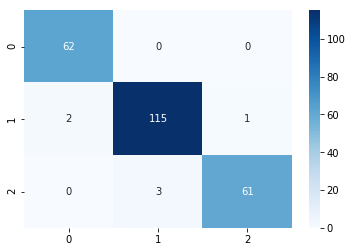

In [106]:
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,cmap='Blues',fmt = 'g')

### Conclusion :
 
 
- The Model created is a good model which can accurately identify the given classe with high precision.
- The classification report shows the High precision values for all three classes which is indicating 'High true positive rate'. And High recall values for all the three classed indicating 'Low false Negative rate.


#### Project work summary:
- Initially Dataset has 846 Rows and 19 columnsincludes the target column 'class')
- As we look closer it contains missing values in few columns.
-  **Treatment of missing values**  :
 - Approach 1 - Replace missing values with median of that columm.
 - Approach 2 - Replace missing values with mode of that column.

I found approach 2 is more suitable option for this particular dataset. So divided original dataframe into three differnt dataframes based on the classes.      **In[17]**
After imputation i have combined all the different datasets into one using append . **In[18].

- **Treatment of outliers** :
 - Approach 1 - Drop the rows containing outliers.
 - Approach 2 - Replace it with some logical values.

I applied approach 1 ,there are total of 33 observations containing outliers which is approximately 3.9% of the total data ,Hence it is less than 10% so dropping is the better option . **In[37]**

-  **Relationship between various variables**  :
Since the heatmap indicates strong multicollinearity.

Careful observation will show us that there exists strong correlartions amongst the following features: **In[65]**

compactness,


distance_circularity,
radius_ratio ,
pr.axis_aspect_ratio ,
scatter_ratio , 
elongatedness , 
pr.axis_rectangularity ,
max.length_rectangularity ,
scaled_variance ,
scaled_variance.1 ,
skewness_about.2 ,
hollows_ratio.

- **Encoding Methods**  :
   - Lablel encoder is used to convert categorical variable into numeric. In[33]
   
- **Seperate dataframe for every level of working :
   I have used seperate dataframe for every analysis just to make sure that at every point my input can give correct analysis.
   - Original_data - contains the original dataset .
   - car_df ,bus_df ,van_df - contains the seperate observations of car ,bus and van respectively.
   - veh   -  Appended dataframe of car_df ,bus_df and van_df.
   - veh_no_out   - Contains after the dropping of outliers.
   - veh2    - Contains only independent variables(dropped variable class)
   -


- **Principle componenet analysis** :
**
Performing PCA on the given dataset is expected to enrich the data by capturing data more effeciently from the mathematical space between the various dimensions. Consequently this would help us to work with lesser number of dimensions & thereby a simplified dataset.
**Since PCA inherently identifies the correlated & uncorrelated features, we can use all the given fearures to perform the analysis, provided that there are atleast few correlated features. Eventually, the variance explained by each PC shall be used to decide whether they get selected for futher analysis or not.**

**we could take 2 approaches :
 
 1) Approach 1 (PCA with all the features) - Obtained excellent accuracy, recall & precision values **(train accuracy of 91.91%, test accuracy of 97.54%)**

2) Approach 2 (PCA with lesser number of features) - Obtained good but lesser ccuracy, recall & precision values than approach 1 **(train accuracy of 89.33%, test accuracy of 91.58%)**
 
  **Due to accuracy ,i have used approach one for this project**
 


